In [1]:
import pandas as pd
import gensim
import time
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
import numpy as np
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
with open('Data/Lemmatized/Vietnam_lemmatized.txt') as file:
    lines = file.readlines()

## Tokenize

In [3]:
corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]

In [4]:
corpus = pd.DataFrame({'reviews': corpus})

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(corpus, test_size=0.2)

In [6]:
docs, docs_train, docs_test = corpus['reviews'], train['reviews'], test['reviews']

In [7]:
# msk = np.random.rand(len(docs)) < 0.8

# docs_train = docs[msk]
# docs_test = docs[~msk]

# print(len(docs_train), len(docs_test))

In [8]:
dictionary = gensim.corpora.Dictionary(docs)

In [10]:
dictionary.items()

ItemsView(<gensim.corpora.dictionary.Dictionary object at 0x14392a3a0>)

In [8]:
bow = [dictionary.doc2bow(doc) for doc in docs]
bow_train = [dictionary.doc2bow(doc) for doc in docs_train]
bow_test = [dictionary.doc2bow(doc) for doc in docs_test]

## TF-IDF

In [9]:
from gensim.models.coherencemodel import CoherenceModel

In [10]:
tfidf = gensim.models.TfidfModel(bow)
tfidf_train = gensim.models.TfidfModel(bow_train)
tfidf_test = gensim.models.TfidfModel(bow_test)

tfidf = tfidf_train[bow]
tfidf_train = tfidf_train[bow_train]
tfidf_test = tfidf_test[bow_test]

In [188]:
country = "China"
no_iterations = 50
file_name_umass = "Data/Result/" + country + "_"+str(no_iterations) +"_result_umass.csv"
file_name_perplexity_train = "Data/Result/" + country + "_"+str(no_iterations) +"_result_perplexity_train.csv"
file_name_perplexity_test = "Data/Result/" + country + "_"+str(no_iterations) +"_result_perplexity_test.csv"
# file_name_uci = "Data/Result/" + country + "_"+str(no_iterations) +"_result_uci.csv"


file_write_umass = open(file_name_umass, "a")
file_write_perplexity_train = open(file_name_perplexity_train, "a")
file_write_perplexity_test = open(file_name_perplexity_test, "a")
# file_write_uci = open(file_name_uci, "a")

for no_topics in range(40,101):

    start = time.time()
    lda_model_tfidf = gensim.models.LdaModel(tfidf_train, 
                                             num_topics=no_topics, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= no_iterations)
    end = time.time()
    print("Number of topics: " + str(no_topics))
    print("Processing time: %fs" % (end - start))
    u_mass = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
    u_mass_res = u_mass.get_coherence() 

    perplexity_train = lda_model_tfidf.log_perplexity(tfidf_train, len(docs_train))
    perplexity_test = lda_model_tfidf.log_perplexity(tfidf_test, len(docs_test))
    #uci = CoherenceModel(model=lda_model_tfidf, texts=train, corpus=bow_train, dictionary=dictionary ,coherence='c_uci', topn=20)
    # uci_res = uci.get_coherence()

    
    file_write_umass.write(str(no_topics) + "," + str(u_mass_res) +","+str(end-start)+"\n")
    file_write_perplexity_train.write(str(no_topics) + "," + str(perplexity_train) +","+str(end - start)+"\n")
    file_write_perplexity_test.write(str(no_topics) + "," + str(perplexity_test) +","+str(end - start)+"\n")
    
    # file_write_uci.write(str(no_topics) + "," + str(uci_res) +","+str(end-start)+"\n")
    
    print("Topics coherence: Umass: " + str(u_mass_res) + " Training-Perplexity: " + str(perplexity_train) + " Test-Perplexity: " + str(perplexity_test))

file_write_umass.close()
file_write_perplexity_train.close()
file_write_perplexity_test.close()

Number of topics: 40
Processing time: 4.716058s
Topics coherence: Umass: -13.531632294394985 Training-Perplexity: -15.766831283256721 Test-Perplexity: -18.128563443874253
Number of topics: 41
Processing time: 4.851867s
Topics coherence: Umass: -13.616166462208124 Training-Perplexity: -15.903820488486726 Test-Perplexity: -18.288552582780024
Number of topics: 42
Processing time: 4.750380s
Topics coherence: Umass: -12.744953897173202 Training-Perplexity: -16.243204008631427 Test-Perplexity: -18.802434576188297
Number of topics: 43
Processing time: 4.824898s
Topics coherence: Umass: -13.404801944493773 Training-Perplexity: -16.31943439950048 Test-Perplexity: -18.758448188706687
Number of topics: 44
Processing time: 5.164793s
Topics coherence: Umass: -13.080474614701103 Training-Perplexity: -16.664659698832796 Test-Perplexity: -19.3153497793537
Number of topics: 45
Processing time: 4.791666s
Topics coherence: Umass: -13.173000374237633 Training-Perplexity: -16.756824291842864 Test-Perplexit

In [297]:
# France train: 77
# China train: 90
# Germany train: 79
# Japan train: 82
# Korea train: 92
# Vietnam train: 76

start = time.time()
lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=76, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= 50)
# end = time.time()
# print("Number of topics: " + str(90))
# print("Processing time: %fs" % (end - start))

# # Umass
# umass_train = CoherenceModel(model=lda_model_tfidf, corpus=bow_train, dictionary=dictionary ,coherence='u_mass', topn=20)
# umass_train = umass_train.get_coherence() 
# umass_test = CoherenceModel(model=lda_model_tfidf, corpus=bow_test, dictionary=dictionary ,coherence='u_mass', topn=20)
# umass_test = umass_test.get_coherence() 
# umass = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
# umass = umass.get_coherence() 
# print("Traininng Umass: " + str(umass_train))
# print("Test Umass: " + str(umass_test))
# print("Umass: " + str(umass))

# # Perplexity
# perplexity_train = lda_model_tfidf.log_perplexity(tfidf_train, len(docs_train))
# perplexity_test = lda_model_tfidf.log_perplexity(tfidf_test, len(docs_test))
# perplexity = lda_model_tfidf.log_perplexity(tfidf, len(docs))

# print("Training Perplexity: " + str(perplexity_train))
# print("Test Perplexity: " + str(perplexity_test))
# print("Perplexity: " + str(perplexity))

In [298]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.045*"memorable" + 0.044*"quick" + 0.026*"net" + 0.020*"jetty" + 0.019*"track" + 0.013*"ops" + 0.007*"independently" + 0.004*"wish" + 0.001*"chay" + 0.000*"waterfall"


Topic: 1 Word: 0.092*"cave" + 0.066*"bay" + 0.063*"halong" + 0.053*"cruise" + 0.049*"surprise" + 0.042*"formation" + 0.018*"rock" + 0.017*"limestone" + 0.014*"tu" + 0.012*"overnight"


Topic: 2 Word: 0.063*"ferry" + 0.035*"suitable" + 0.034*"treat" + 0.033*"turned" + 0.033*"poor" + 0.033*"man" + 0.027*"travelled" + 0.024*"rude" + 0.022*"traveller" + 0.022*"thanks"


Topic: 3 Word: 0.063*"amazed" + 0.050*"awful" + 0.023*"pic" + 0.021*"none" + 0.012*"protect" + 0.008*"cheapest" + 0.007*"comfort" + 0.006*"willing" + 0.004*"cleanliness" + 0.003*"organization"


Topic: 4 Word: 0.119*"peaceful" + 0.028*"quiet" + 0.028*"inspiring" + 0.028*"skip" + 0.026*"tranquil" + 0.024*"lead" + 0.024*"hai" + 0.023*"calm" + 0.021*"ready" + 0.021*"awe"


Topic: 5 Word: 0.056*"scenic" + 0.050*"deck" + 0.045*"ever" + 0.042*"ive"

In [299]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model_tfidf, tfidf, dictionary, mds='tsne')

/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
70       28.030617  -194.668533       1        1  24.581234
8     -8894.640625  1309.594604       2        1  13.970284
18     9998.727539 -2885.978271       3        1   5.476175
75       15.447316  -228.904648       4        1   4.521268
67       55.301491  -217.460327       5        1   3.749979
...            ...          ...     ...      ...        ...
0        -9.805758    31.347029      72        1   0.337053
31       14.112362    38.049091      73        1   0.326763
20       31.218950    18.534716      74        1   0.320975
38       20.217243    -2.163475      75        1   0.306024
27        7.298611    13.960320      76        1   0.275095

[76 rows x 5 columns], topic_info=          Term        Freq       Total Category  logprob  loglift
557       cave  517.000000  517.000000  Default  30.0000  30.0000
2070     beach  388.000000  388.000000  Default  29.0000  29.0000
850       lake  184.000000  184.000000  Default  28.0000  28.0000
3407      ruin  117.000000  117.000000  Default  27.0000  27.0000
1314       bay  197.000000  197.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
3244         b    0.011549    9.862633  Topic76  -9.8535  -0.8541
2729   venture    0.011549    5.270131  Topic76  -9.8535  -0.2274
4643     ferry    0.011549   40.976342  Topic76  -9.8536  -2.2784
106       good    0.011548  268.724444  Topic76  -9.8536  -4.1591
4135  previous    0.011548    8.421777  Topic76  -9.8536  -0.6962

[3260 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3347     60  0.784971   abandoned
2302     38  0.711992     ability
3312     38  0.467458      abound
553       3  0.359495  absolutely
553      10  0.395444  absolutely
...     ...       ...         ...
5596     15  0.453789     zealand
2463     40  0.693909        zero
3573     24  0.775611         zip
2509     71  0.919250        zone
3570      1  0.903641         zoo

[4625 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[71, 9, 19, 76, 68, 41, 59, 45, 2, 46, 58, 10, 17, 44, 70, 61, 60, 73, 53, 36, 57, 5, 51, 16, 56, 42, 22, 3, 54, 52, 74, 12, 48, 62, 29, 26, 67, 47, 35, 49, 72, 7, 63, 20, 50, 66, 23, 25, 33, 30, 65, 27, 40, 69, 64, 75, 8, 13, 43, 18, 6, 55, 31, 34, 37, 14, 24, 4, 38, 11, 15, 1, 32, 21, 39, 28])

## Save output

In [309]:
COUNTRY = ["China", "France", "Germany", "Japan", "Korea", "Vietnam"]
NUM_TOPICS = {
    "China": 90,
    "France": 77,
    "Germany": 79, 
    "Japan": 82, 
    "Korea": 92, 
    "Vietnam": 76
}

def save_output(country="China", no_iterations=50, test_size=0.2):
    # read data
    data_file = "Data/Lemmatized/" + country + "_lemmatized.txt"
    with open(data_file) as file:
        lines = file.readlines()
    print("Read data from path: " + data_file)
    
    # tokenize
    corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]
    
    # get corpus
    corpus = pd.DataFrame({'reviews': corpus})
    docs = corpus['reviews']
    
    # # train test split
    train, test = train_test_split(corpus, test_size=test_size)
    docs, docs_train, docs_test = corpus['reviews'], train['reviews'], test['reviews']
    
    # vocabulary / dictionary
    dictionary = gensim.corpora.Dictionary(docs)
    
    # BOW
    bow = [dictionary.doc2bow(doc) for doc in docs]
    bow_train = [dictionary.doc2bow(doc) for doc in docs_train]
    bow_test = [dictionary.doc2bow(doc) for doc in docs_test]
    
    # tfidf
    tfidf = gensim.models.TfidfModel(bow)
    tfidf_train = gensim.models.TfidfModel(bow_train)
    tfidf_test = gensim.models.TfidfModel(bow_test)

    tfidf = tfidf[bow]
    tfidf_train = tfidf_train[bow_train]
    tfidf_test = tfidf_test[bow_test]
    
    # retrieve topic
    no_topics = NUM_TOPICS[country]
    
    lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=no_topics, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= no_iterations)
    
    directory = "Data/Output/All/" + country
    file_output = directory + "/" + country
    if not os.path.exists(directory):
        os.makedirs(directory)

    # plot and save
    
    plt.figure()
    for t in range(lda_model_tfidf.num_topics):
        plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
        plt.axis("off")
        plt.title("Topic #" + str(t))
        plt.savefig(file_output + "_topic_" + str(t), dpi=1000)
        plt.clf()

In [308]:
for country in COUNTRY:
    save_output(country=country, no_iterations=50, test_size=0.2)

Read data from path: Data/Lemmatized/China_lemmatized.txt
Read data from path: Data/Lemmatized/France_lemmatized.txt
Read data from path: Data/Lemmatized/Germany_lemmatized.txt
Read data from path: Data/Lemmatized/Japan_lemmatized.txt
Read data from path: Data/Lemmatized/Korea_lemmatized.txt
Read data from path: Data/Lemmatized/Vietnam_lemmatized.txt


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

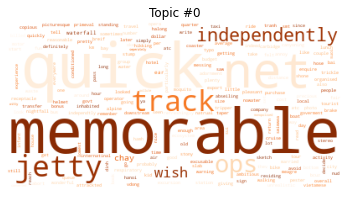

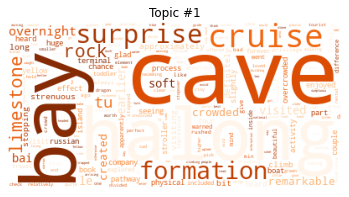

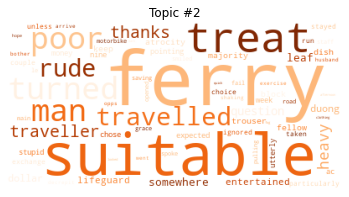

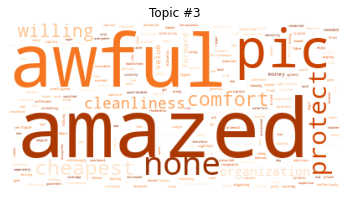

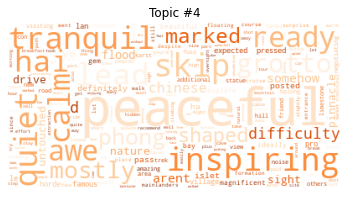

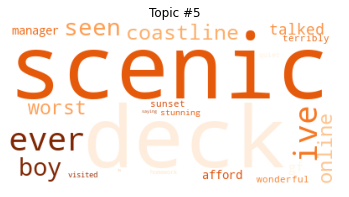

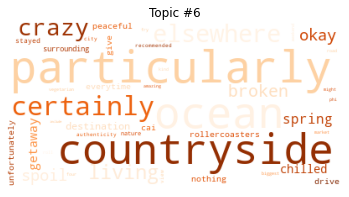

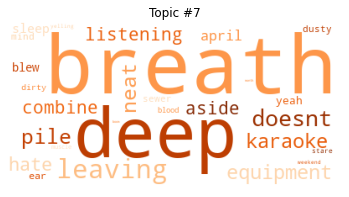

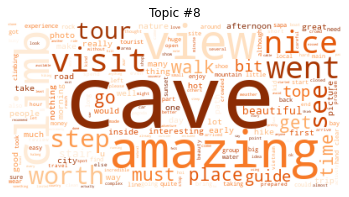

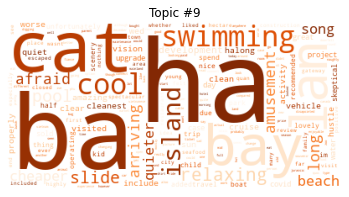

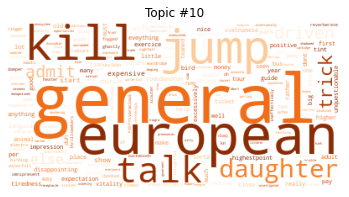

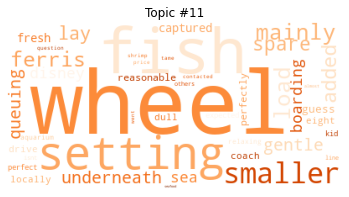

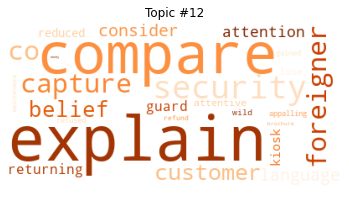

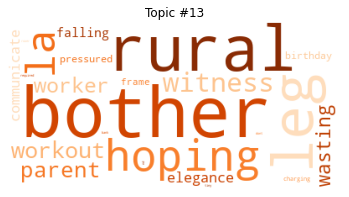

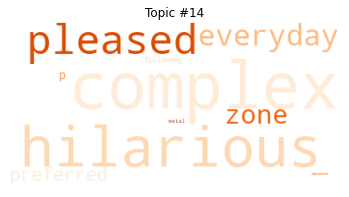

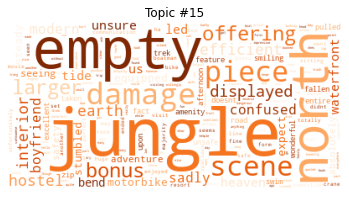

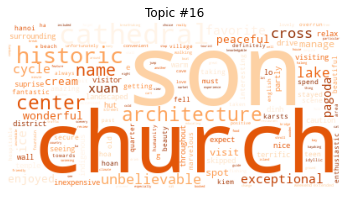

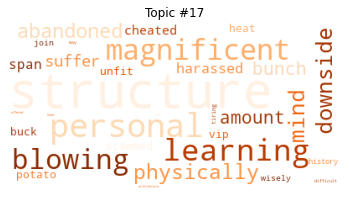

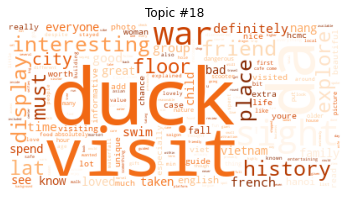

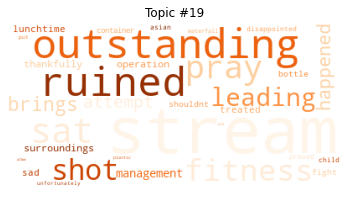

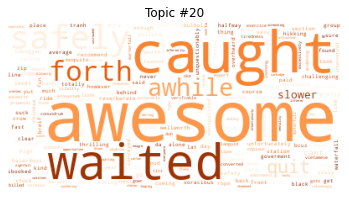

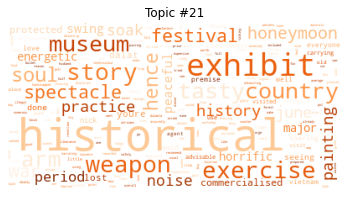

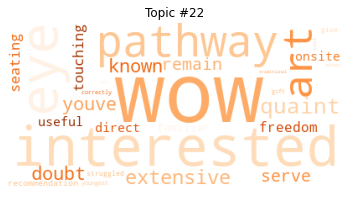

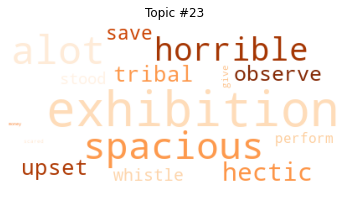

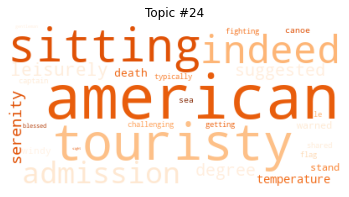

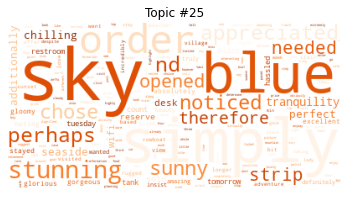

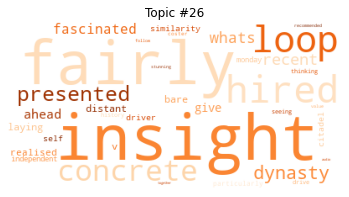

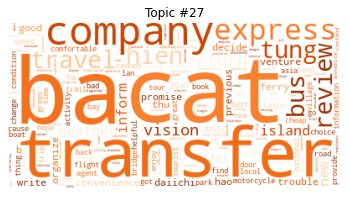

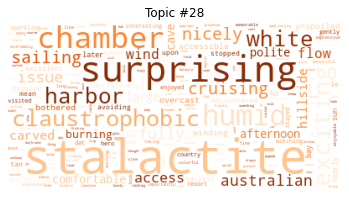

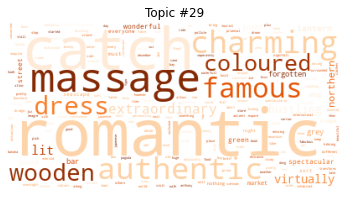

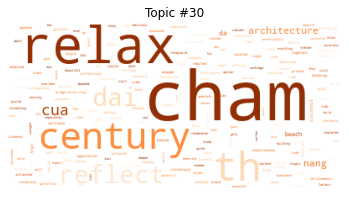

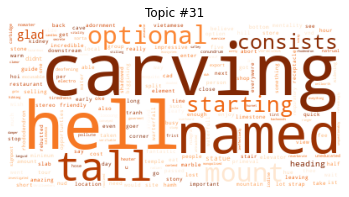

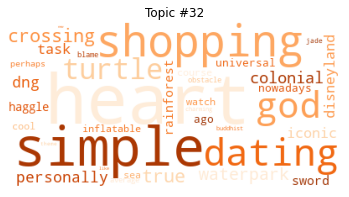

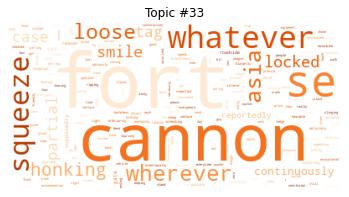

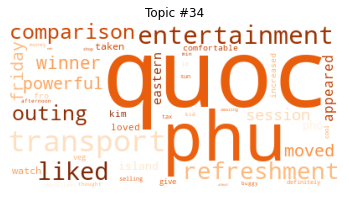

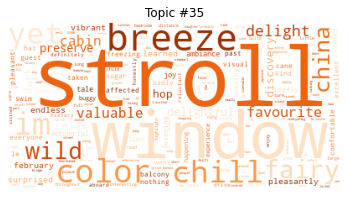

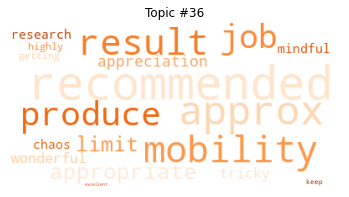

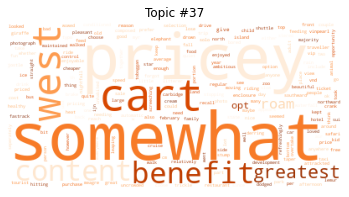

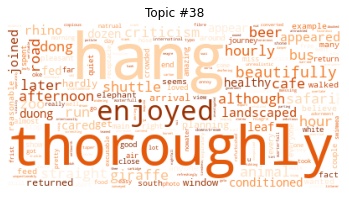

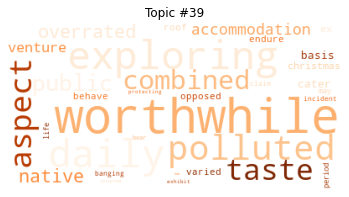

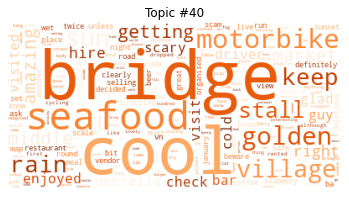

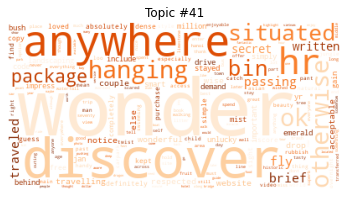

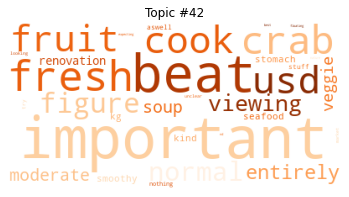

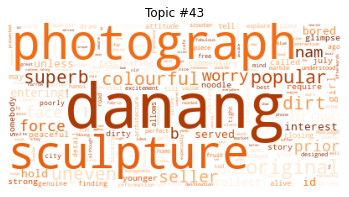

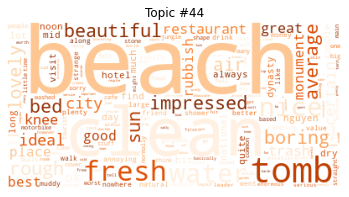

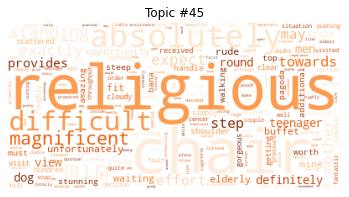

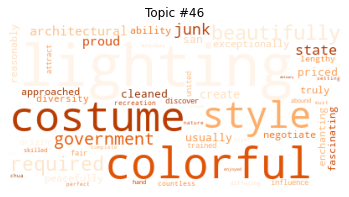

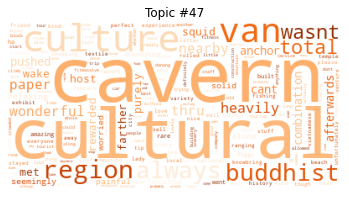

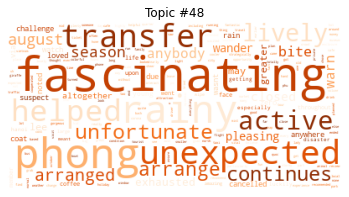

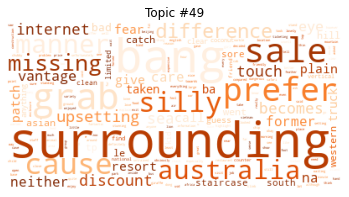

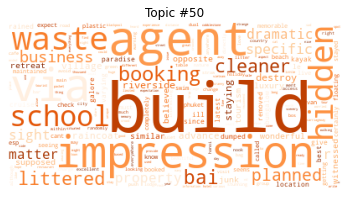

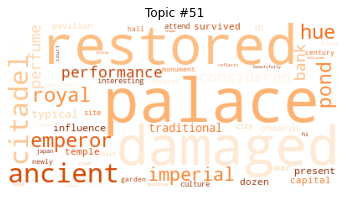

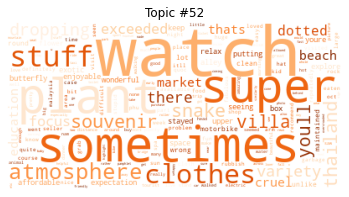

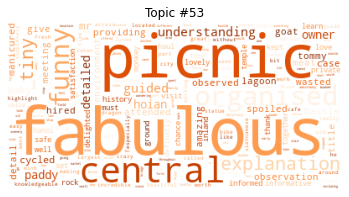

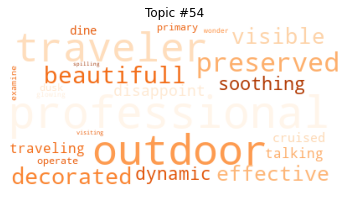

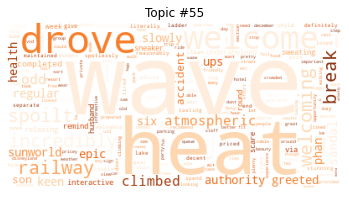

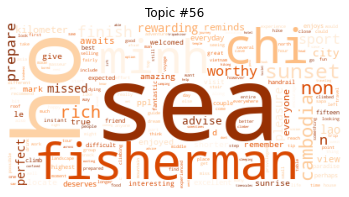

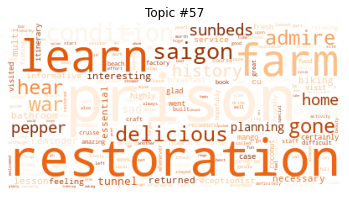

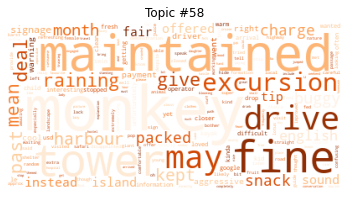

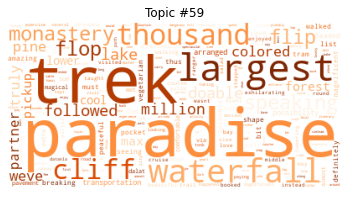

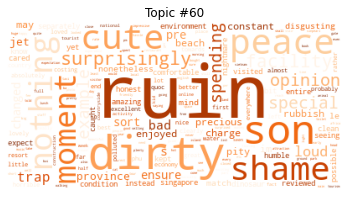

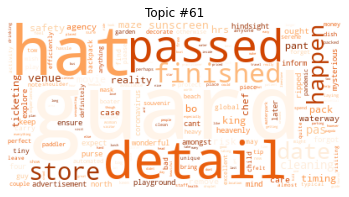

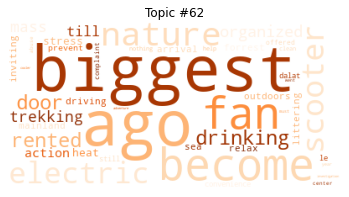

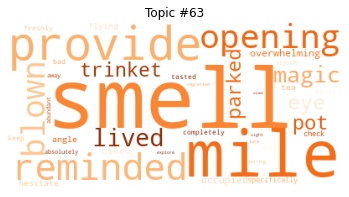

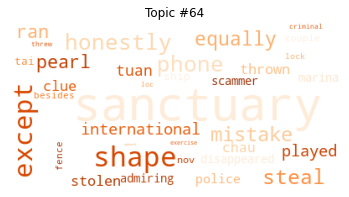

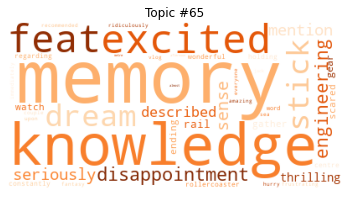

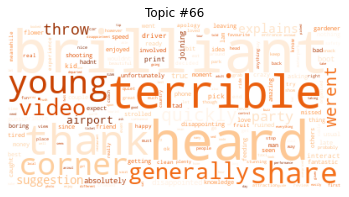

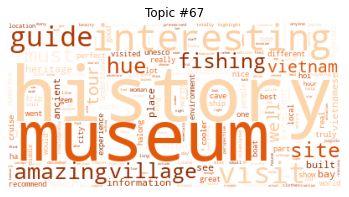

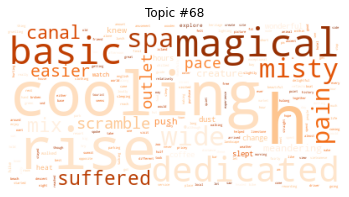

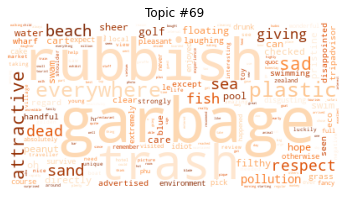

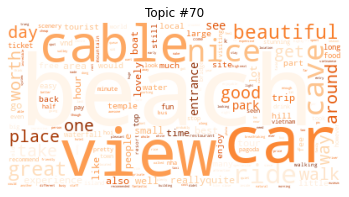

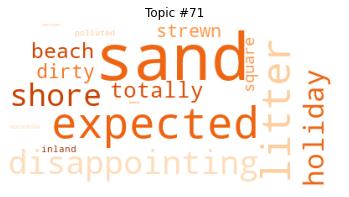

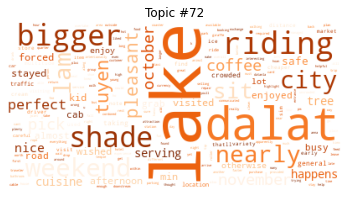

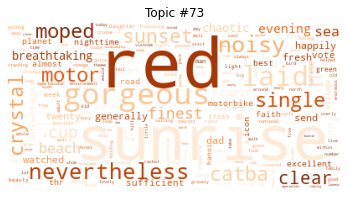

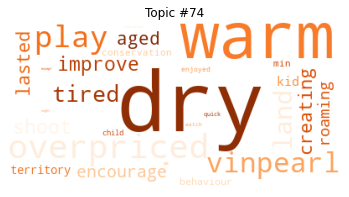

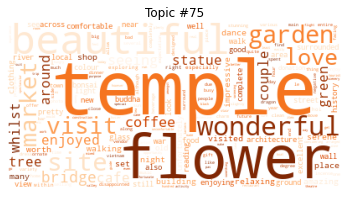

In [300]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model_tfidf.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [301]:
from gensim.test.utils import datapath

lda_model_tfidf.save("Data/Models/Vietnam/Vietnam")